In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/user/andrassy/PyPPM')
from ppmpy import ppm
from matplotlib import pyplot as plt
%matplotlib nbagg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def list_columns(obj, cols=6, columnwise=True, gap=4):
    """
    Print the given list in evenly-spaced columns.

    Parameters
    ----------
    obj : list
        The list to be printed.
    cols : int
        The number of columns in which the list should be printed.
    columnwise : bool, default=True
        If True, the items in the list will be printed column-wise.
        If False the items in the list will be printed row-wise.
    gap : int
        The number of spaces that should separate the longest column
        item/s from the next column. This is the effective spacing
        between columns based on the maximum len() of the list items.
    """

    sobj = [str(item) for item in obj]
    if cols > len(sobj): cols = len(sobj)
    max_len = max([len(item) for item in sobj])
    if columnwise: cols = int(math.ceil(float(len(sobj)) / float(cols)))
    plist = [sobj[i: i+cols] for i in range(0, len(sobj), cols)]
    if columnwise:
        if not len(plist[-1]) == cols:
            plist[-1].extend(['']*(len(sobj) - len(plist[-1])))
        plist = zip(*plist)
    printer = '\n'.join([
        ''.join([c.ljust(max_len + gap) for c in p])
        for p in plist])
    print(printer)

# Initialisation

In [5]:
run_dir = '/user/niagara_projects/PPM2.0/M_H-core-M25/M8-Hcore25-768-1000x/prfs/'
rp_set = ppm.RprofSet(run_dir)

622 rprof files found in '/user/niagara_projects/PPM2.0/M_H-core-M25/M8-Hcore25-768-1000x/prfs/.
Dump numbers range from 0 to 621.
Reading history file '/user/niagara_projects/PPM2.0/M_H-core-M25/M8-Hcore25-768-1000x/prfs/Hcore000768-0000.hstry'.


# Run history

In [6]:
rp_hst = rp_set.get_history()

In [7]:
rp_hst.get_variables()

['NDump',
 'NCycle',
 'time(secs)',
 'time(mins)',
 'dt(secs)',
 'Courant',
 'MachNoMax',
 'TotalFlops',
 'TimeStamp']

In [8]:
list_columns(rp_hst.get('NDump'), cols=15)

0      43     86     129    164    207    250    293    336    379    422    465    508    551    592    
1      44     87     130    165    208    251    294    337    380    423    466    509    552    593    
2      45     88     131    166    209    252    295    338    381    424    467    510    553    594    
3      46     89     132    167    210    253    296    339    382    425    468    511    554    595    
4      47     90     133    168    211    254    297    340    383    426    469    512    555    596    
5      48     91     134    169    212    255    298    341    384    427    470    513    556    597    
6      49     92     135    170    213    256    299    342    385    428    471    514    557    598    
7      50     93     136    171    214    257    300    343    386    429    472    515    558    599    
8      51     94     137    172    215    258    301    344    387    430    473    516    559    600    
9      52     95     138    173    216    259 

<IPython.core.display.Javascript object>


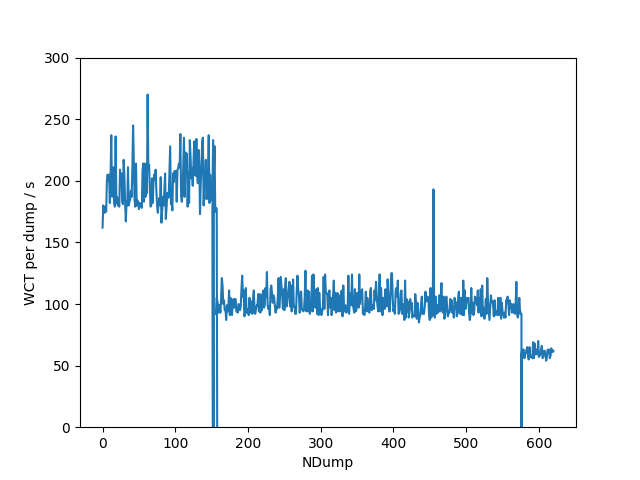

/user/andrassy/PyPPM/ppmpy/ppm.py:7624: RuntimeWarning: divide by zero encountered in true_divide
  (np.roll(dumps, -1) - dumps)


(0.0, 300.0)

In [9]:
ifig=1; plt.close(ifig); plt.figure(ifig)
rp_hst.plot_wct_per_dump()
plt.ylim((0., 300.))

# Reading and plotting data

<IPython.core.display.Javascript object>


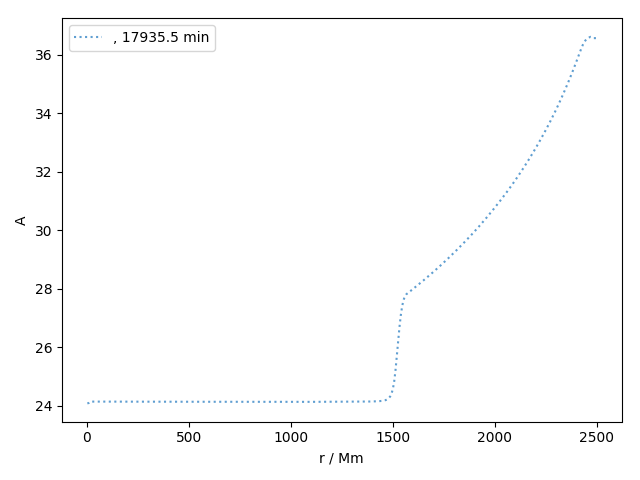

Dump 106 at t = 17935.50 min is the closest to t = 18000.00 min.
Dump 106 at t = 17935.50 min is the closest to t = 18000.00 min.
Dump 106 at t = 17935.50 min is the closest to t = 18000.00 min.


In [10]:
ifig=2; plt.close(ifig); plt.figure(ifig)
rp_set.plot_A(300.*3600, num_type='t', resolution='l')

In [11]:
dump = 100
list_columns(rp_set.get('A', 300.*3600, num_type='t', resolution='l'), cols=8)

Dump 106 at t = 17935.50 min is the closest to t = 18000.00 min.
24.083166    24.142397    24.138123    24.135128    24.139053    27.804529    29.78768     32.688667    
24.095514    24.142227    24.13806     24.135139    24.139235    27.844557    29.836269    32.765507    
24.143536    24.142193    24.138008    24.135157    24.139458    27.878365    29.885216    32.843224    
24.145004    24.142046    24.137907    24.135185    24.139664    27.913755    29.93471     32.921864    
24.144728    24.141973    24.137751    24.13525     24.139875    27.950417    29.9846      33.001511    
24.144615    24.141891    24.137636    24.135296    24.140112    27.987104    30.034994    33.082054    
24.144493    24.141748    24.137564    24.13533     24.140318    28.02354     30.085938    33.163589    
24.144402    24.141634    24.137465    24.135365    24.140594    28.060108    30.137402    33.24612     
24.144337    24.141523    24.137333    24.135393    24.140852    28.096849    30.18931     33.3

In [12]:
rp = rp_set.get_dump(400)

In [17]:
list_columns(rp.get_header_variables(), cols=3)

airmu                         ifintel                       nvars                         
argsimg(1)                    ifmoms                        nViews                        
argsimg(10                    ifnotviolent                  NWorkersPerTeam               
argsimg(11                    ifnowriteback                 Nx                            
argsimg(12                    ifpmoms                       NXBricks                      
argsimg(13                    ifsimplechop                  NXBricksPerTeam               
argsimg(14                    ifsloflo                      NXTeams                       
argsimg(15                    ifsrend                       NYBricks                      
argsimg(16                    ifteambobs                    NYTeams                       
argsimg(17                    isstar                        NZBricks                      
argsimg(18                    lenbob8                       NZTeams                       

In [14]:
print('Nx = ' + str(rp.get('Nx')))
print('airmu = ' + str(rp.get('airmu')))
print('cldmu = ' + str(rp.get('cldmu')))

Nx = 768
airmu = 0.6690000295639038
cldmu = 0.6169999837875366


In [15]:
rp.get_hr_variables()

['FV', 'FV0', 'P0', 'P1', 'R', 'Rho0', 'Rho1', 'T9']

In [16]:
list_columns(rp.get_lr_variables())

A               dRhoUrUsqRMS    EnucSumMax      Mach#           Rho1fMin        Ur              
Ceul            dT9RMS          EnucSumMin      MachMax         RhoUr           UrMax           
dEnucRMS        dUrRMS          FV              MachMin         RhoUrH          UrMin           
dEnucSumRMS     d|Ut|RMS        FVMax           P1/P0           RhoUrUsq        |Ut|            
dFVrms          d|U|RMS         FVMin           P1fMax          RhoUrUsqMax     |Ut|Max         
dHburnedRMS     Enuc            Hburned         P1fMin          RhoUrUsqMin     |Ut|Min         
dMachRMS        EnucMax         HburnedMax      R               T9              |U|             
dP1fRMS         EnucMin         HburnedMin      Rho1/Rho0       T9Max           |U|Max          
dRho1fRMS       EnucSum         Mach            Rho1fMax        T9Min           |U|Min          
